In [182]:
import numpy as np
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression

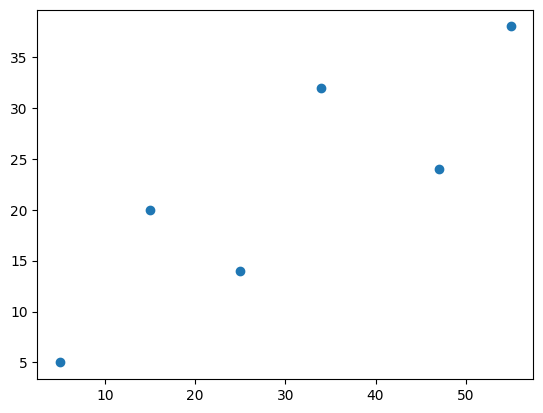

In [183]:
x = np.array([5,15,25,34,47,55]).reshape((-1,1))
y = np.array([5,20,14,32,24,38])

plt.scatter(x,y)
plt.show()

In [184]:
model = LinearRegression()
model.fit(x,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [185]:
model = LinearRegression().fit(x,y)

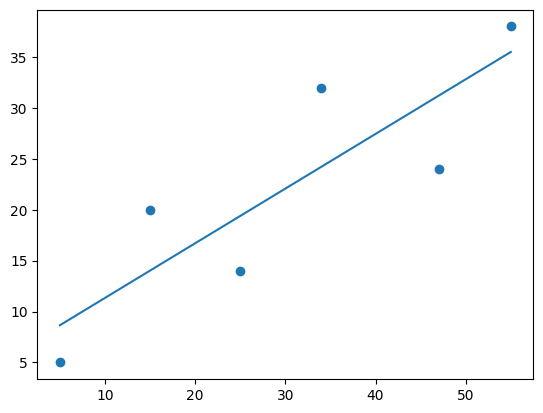

In [186]:
y_pred = model.predict(x)
y_pred = model.intercept_ + model.coef_*x
plt.plot(x,y_pred)
plt.scatter(x,y)
plt.show()

In [187]:
model.score(x,y)

0.7255090758067395

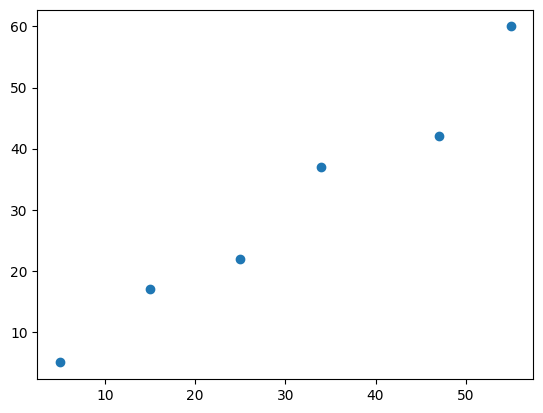

In [188]:
x = np.array([5,15,25,34,47,55]).reshape((-1,1))
y = np.array([5,17,22,37,42,60])

plt.scatter(x,y)
plt.show()

In [189]:
from sklearn.preprocessing import PolynomialFeatures
x_ = PolynomialFeatures(degree=5, include_bias=False).fit_transform(x)
model = LinearRegression().fit(x_,y)


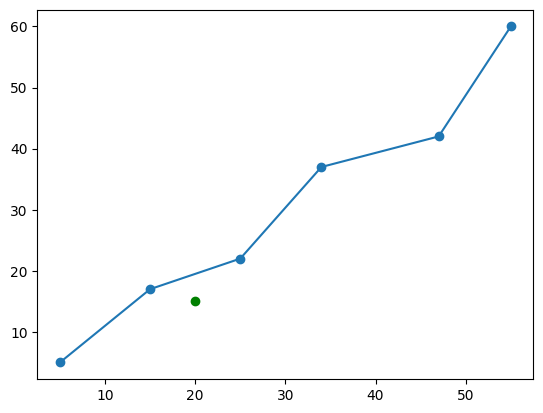

In [190]:
y_pred = model.predict(x_)
plt.plot(x,y_pred)
plt.scatter(x,y)
plt.scatter([20],[15],c='green')
plt.show()

# Overfitting

In [191]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.1,random_state=45676)


In [192]:
x.shape

(6, 1)

In [193]:
x_train.shape

(5, 1)

In [194]:
x_test.shape

(1, 1)

In [195]:
from sklearn.linear_model import ridge_regression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [196]:
np.random.seed(546)
X=np.linspace(0,10,100).reshape(-1,1)
y = 3*X.squeeze() + 5 + np.random.randn(100)*3

X.shape

(100, 1)

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=45676)

In [198]:
model=Ridge(alpha=1000)
model.fit(X_train,y_train)

,alpha,1000
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [199]:
y_pred = model.predict(X_test)
y_pred

array([14.87900366, 19.90279786, 24.58406064, 14.9931808 , 23.21393495,
       22.41469497, 23.32811209, 23.8989978 , 21.9579864 , 20.70203785,
       16.13495221, 20.93039213, 22.87140353, 22.18634068, 16.36330649,
       24.12735208, 25.61165491, 24.69823779, 16.47748364, 19.56026644])

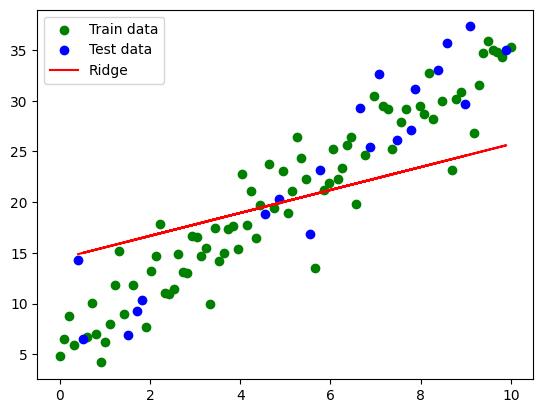

In [200]:
plt.scatter(X_train,y_train,color='green',label='Train data')
plt.scatter(X_test,y_test,color='blue',label='Test data')
plt.plot(X_test,y_pred,label='Ridge',color='red')
plt.legend()
plt.show()

In [201]:
y_pred_train = model.predict(X_train)
mean_squared_error(y_train,y_pred_train)

31.534692905144347

In [202]:
mean_squared_error(y_test,y_pred)

50.66147222845281

# Classification

In [203]:
import pandas as pd
import seaborn as sb
from sklearn import datasets 

In [204]:
iris = pd.read_csv('iris.csv')

In [205]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: title={'center': 'Petal'}, xlabel='petal_length', ylabel='petal_width'>

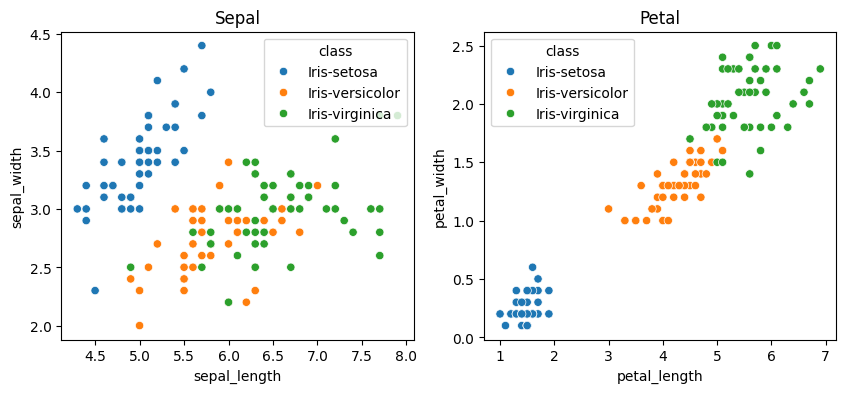

In [206]:
fig, axes = plt.subplots(1,2,figsize=(10,4))
axes[0].set_title('Sepal')
axes[1].set_title('Petal')
sb.scatterplot(iris,x='sepal_length',y='sepal_width',hue='class',ax=axes[0])
sb.scatterplot(iris,x='petal_length',y='petal_width',hue='class',ax=axes[1])

In [207]:
features = iris.columns.drop('class')

In [208]:
features

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [209]:
target = 'class'
X = iris[features]
Y = iris[target]

In [210]:
X, Y

(     sepal_length  sepal_width  petal_length  petal_width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 0         Iris-setosa
 1         Iris-setosa
 2         Iris-setosa
 3         Iris-setosa
 4         Iris-setosa
             ...      
 145    Iris-virginica
 146    Iris-virginica
 147    Iris-virginica
 148    Iris-virginica
 149    Iris-virginica
 Name: class

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=45676)

In [180]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [ ]:
X_train


,sepal_length,sepal_width,petal_length,petal_width
58,6.6,2.9,4.6,1.3
149,5.9,3.0,5.1,1.8
3,4.6,3.1,1.5,0.2
117,7.7,3.8,6.7,2.2
115,6.4,3.2,5.3,2.3
...,...,...,...,...
10,5.4,3.7,1.5,0.2
20,5.4,3.4,1.7,0.2
32,5.2,4.1,1.5,0.1
49,5.0,3.3,1.4,0.2


In [181]:
from sklearn.preprocessing import LabelEncoder

In [148]:
le = LabelEncoder()
le.fit(y_train)             # target var we want to transform 

LabelEncoder()

In [149]:
le.transform(y_train)       # classes as numerical
# mix of nrs bc random sampling from train/test split  

array([1, 2, 0, 2, 2, 1, 1, 1, 2, 0, 1, 0, 0, 2, 1, 1, 1, 2, 0, 1, 2, 0,
       0, 2, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 1, 2, 2, 0, 2, 0,
       2, 2, 2, 1, 0, 2, 0, 0, 0, 1, 2, 1, 0, 2, 2, 1, 2, 0, 0, 1, 2, 2,
       0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0,
       1, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2, 1, 2, 1, 2, 0, 0, 2, 0, 0, 1, 2,
       1, 1, 2, 1, 1, 0, 0, 0, 0, 1])

In [214]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [216]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
x_train_st = scaler.transform(X_train)
x_test_st = scaler.transform(X_test)

In [218]:
x_train_st.shape

(120, 4)

In [219]:
x_train.shape

(5, 1)

In [220]:
from sklearn import svm

In [229]:
model = svm.SVC()
model.fit(x_train_st, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [233]:
y_pred = model.predict(x_test_st) ## prediction
y_pred

array([2, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0, 1, 2, 2, 1, 1, 0, 1, 2,
       2, 2, 1, 0, 2, 1, 1, 1])

In [235]:
y_pred, y_test ## truth

(array([2, 1, 1, 0, 1, 0, 0, 2, 0, 2, 2, 1, 0, 0, 1, 2, 2, 1, 1, 0, 1, 2,
        2, 2, 1, 0, 2, 1, 1, 1]),
 array([2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 0, 1, 1, 2, 1, 1, 0, 1, 2,
        2, 2, 1, 0, 2, 1, 1, 1]))

In [238]:
from sklearn.metrics import confusion_matrix

In [ ]:
cm = confusion_matrix(y_test,y_pred)
class_names = ['setosa','versicolor','virginica']

['setosa', 'versicolor', 'virginica']

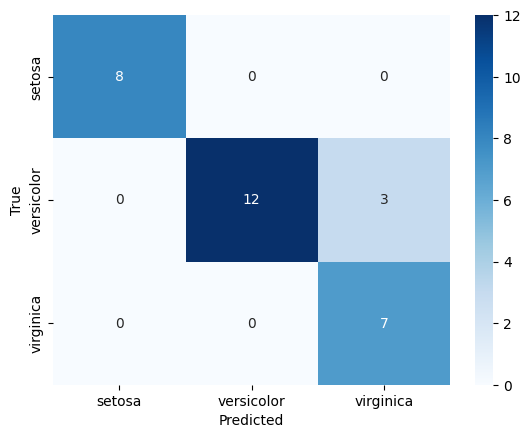

In [242]:
import seaborn as sns
sns.heatmap(cm,annot=True,cmap='Blues',xticklabels=class_names,yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [243]:
from sklearn.tree import DecisionTreeClassifier

In [244]:
model = DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=24546)

In [245]:
model.fit(x_train_st,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,24546
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [246]:
y_pred = model.predict(x_test_st)

In [247]:
cm = confusion_matrix(y_test,y_pred)

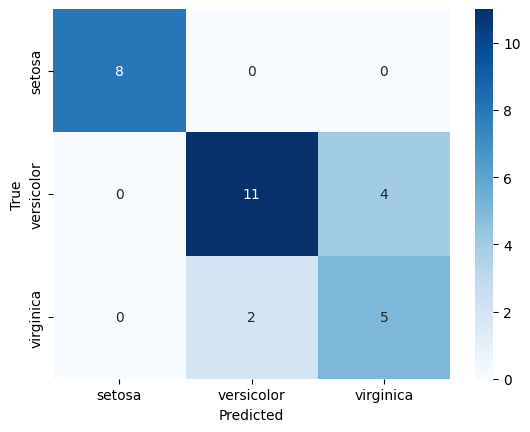

In [248]:
sns.heatmap(cm,annot=True,cmap='Blues',xticklabels=class_names,yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

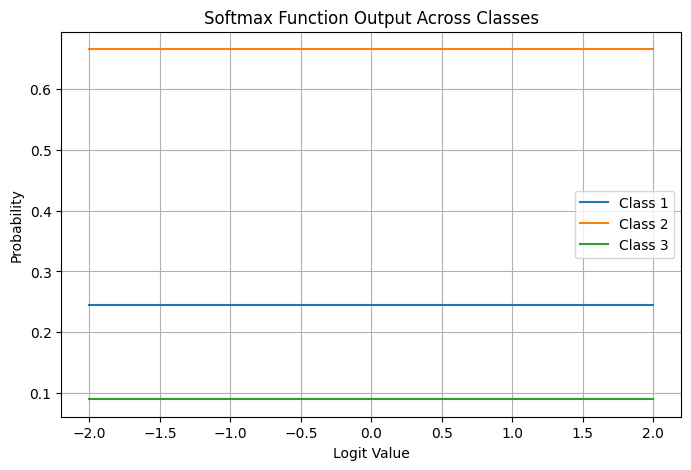

In [249]:
def softmax(x):
    e_x = np.exp(x - np.max(x))  # for numerical stability
    return e_x / np.sum(e_x)

# Simulate input logits for 3 classes
logits = np.linspace(-2, 2, 100)
class1 = logits
class2 = logits + 1.0  # Shifted to show class preference
class3 = logits - 1.0

# Stack into a matrix for multiple input vectors
logits_matrix = np.vstack([class1, class2, class3])

# Apply softmax across each input set (axis=0: each column is one input set)
softmax_outputs = np.apply_along_axis(softmax, 0, logits_matrix)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(logits, softmax_outputs[0], label="Class 1")
plt.plot(logits, softmax_outputs[1], label="Class 2")
plt.plot(logits, softmax_outputs[2], label="Class 3")

plt.title("Softmax Function Output Across Classes")
plt.xlabel("Logit Value")
plt.ylabel("Probability")
plt.legend()
plt.grid(True)
plt.show()